# Mongabay Fire Tool

In this notebook we will perform all the data processing required for the [Fire tool](https://docs.google.com/document/d/1zpwxTejaSbb7tq3uFnwVx_fzysTMBZJvnJEhuDW4vAE/edit#).

For the fire alerts we will use the VIIRS alerts coming from GFW. 
[Here](https://www.globalforestwatch.org/dashboards/country/BRA/?category=fires&dashboardPrompts=eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6WyJkb3dubG9hZERhc2hib2FyZFN0YXRzIiwiZGFzaGJvYXJkQW5hbHlzZXMiLCJ3aWRnZXRTZXR0aW5ncyIsInNoYXJlV2lkZ2V0Il0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJkYXNoYm9hcmRBbmFseXNlcyIsIndpZGdldFNldHRpbmdzIl0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJkYXNoYm9hcmRBbmFseXNlcyIsIndpZGdldFNldHRpbmdzIl0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJkYXNoYm9hcmRBbmFseXNlcyJdLCJzZXR0aW5ncyI6eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6W10sInNldHRpbmdzIjp7Im9wZW4iOmZhbHNlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5IjoiIn0sIm9wZW4iOnRydWUsInN0ZXBzS2V5IjoiZG93bmxvYWREYXNoYm9hcmRTdGF0cyJ9LCJvcGVuIjp0cnVlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5Ijoid2lkZ2V0U2V0dGluZ3MifSwic3RlcHNLZXkiOiJ3aWRnZXRTZXR0aW5ncyIsInN0ZXBJbmRleCI6LTEsImZvcmNlIjp0cnVlfSwib3BlbiI6dHJ1ZSwic3RlcEluZGV4IjowLCJzdGVwc0tleSI6InNoYXJlV2lkZ2V0In0sInN0ZXBzS2V5Ijoic2hhcmVXaWRnZXQiLCJmb3JjZSI6dHJ1ZX0%3D&fireAlertStats=eyJzdGFydEluZGV4IjowLCJlbmRJbmRleCI6NTEsInN0YXJ0RGF0ZUFic29sdXRlIjoiMjAyMC0xMS0zMCIsImVuZERhdGVBYnNvbHV0ZSI6IjIwMjEtMTEtMjIifQ%3D%3D&location=WyJjb3VudHJ5IiwiQlJBIl0%3D&map=eyJjZW50ZXIiOnsibGF0IjotMTUuMTI4MzAwNzgxNjIwNzUsImxuZyI6LTU0LjM5MDU3OTIxOTk5MjgxfSwiem9vbSI6My40OTg0NTEzMzAyNjUwNDUsImNhbkJvdW5kIjpmYWxzZSwiZGF0YXNldHMiOlt7ImRhdGFzZXQiOiJwb2xpdGljYWwtYm91bmRhcmllcyIsImxheWVycyI6WyJkaXNwdXRlZC1wb2xpdGljYWwtYm91bmRhcmllcyIsInBvbGl0aWNhbC1ib3VuZGFyaWVzIl0sImJvdW5kYXJ5Ijp0cnVlLCJvcGFjaXR5IjoxLCJ2aXNpYmlsaXR5Ijp0cnVlfSx7ImRhdGFzZXQiOiJmaXJlLWFsZXJ0cy12aWlycyIsImxheWVycyI6WyJmaXJlLWFsZXJ0cy12aWlycyJdLCJvcGFjaXR5IjoxLCJ2aXNpYmlsaXR5Ijp0cnVlLCJ0aW1lbGluZVBhcmFtcyI6eyJzdGFydERhdGVBYnNvbHV0ZSI6IjIwMjEtMDgtMjQiLCJlbmREYXRlQWJzb2x1dGUiOiIyMDIxLTExLTIyIiwic3RhcnREYXRlIjoiMjAyMS0wOC0yNCIsImVuZERhdGUiOiIyMDIxLTExLTIyIiwidHJpbUVuZERhdGUiOiIyMDIxLTExLTIyIn19XX0%3D&scrollTo=fireAlertStats&showMap=false&widget=fireAlertStats) an example of a chart with that data.

And here the endpoin to retrieve the data with a query example:

```
https://data-api.globalforestwatch.org/dataset/gadm__viirs__iso_weekly_alerts/v202105/query/json?sql=SELECT iso, alert__year, alert__week, SUM(alert__count) AS alert__count, confidence__cat FROM data WHERE iso = 'BRA' AND confidence__cat = 'h' and alert__year = 2021 GROUP BY iso, alert__year, alert__week, confidence__catt to retrieve the data with a query example:

```

For the precipitation data we will use the [CHIRPS Daily dataset from  GEE](https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_DAILY#description). Notice that this dataset doesn’t cover the whole world.


The chart will include the following elements:
- moving average of weekly precipitation.
- long-term average of weekly precipitation.
- Cumulative fire alerts
- long-term average of cumulative fire alerts.

The scope of the geographical data should be national (iso) or regional (adm1). 


# Setup
## Library import
We import all the required Python libraries

In [28]:
import os
import ee
import wxee
import geemap
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray_leaflet
import ipyleaflet as ipyl
import json
import requests
import math

ee.Initialize()

# Data import
## [CHIRPS Daily dataset from  GEE](https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_DAILY#description)
**Automated conversion from Earth Engine JavaScripts to Python scripts**

In [27]:
js_dir = '/home/iker/Vizzuality/Proiektuak/sci_team_data_bank/Projects/mongabay/processing'
geemap.conversion.js_to_python_dir(in_dir=js_dir, out_dir=js_dir, use_qgis=True)
print("Python scripts saved at: {}".format(js_dir))

Converting Earth Engine JavaScripts to Python scripts...

Processing 1/2: /home/iker/Vizzuality/Proiektuak/sci_team_data_bank/Projects/mongabay/processing/create_grid.js
Processing 2/2: /home/iker/Vizzuality/Proiektuak/sci_team_data_bank/Projects/mongabay/processing/Precipitation.js
Python scripts saved at: /home/iker/Vizzuality/Proiektuak/sci_team_data_bank/Projects/mongabay/processing


### Read data from GEE

**Get geometry from geostore**

In [6]:
url = 'https://api.resourcewatch.org/v2/geostore/admin/BRA?thresh=0.05'

r = requests.get(url)
geometry = r.json().get('data').get('attributes').get('geojson')

aoi = ee.Geometry(geometry.get('features')[0].get('geometry'))

**Breaks geometry into a grid**

In [65]:
# Script takes an arbitrary feature and breaks it into and n by n equal-area grid. 
# The grid is then clipped against the original geometry.

# Returns a featureCollection of Grids
 
# 'Based on code from':

# '- https':#gis.stackexchange.com/questions/231959/draw-a-grid-of-polygons-in-google-earth-engine
# '- https':#gis.stackexchange.com/questions/318959/get-lon-lat-of-a-top-left-corner-for-geometry-in-google-earth-engine/318983

#


# Function takes a feature and a grid dimension, n
def getClippedGrid(feat, n):

    # Get features bounds
    bounds = feat.bounds().geometry().bounds()

    # Get a list of coordinates
    listCoords = ee.Array.cat(bounds.coordinates(), 1)
    #print('Coords: ', listCoords)

    # get the x and y-coordinates as lists
    xCoords = listCoords.slice(1, 0, 1)
    yCoords = listCoords.slice(1, 1, 2)

    # reduce the arrays to find the max (or min) value (edges of grid)
    lon_start = xCoords.reduce('min', [0]).get([0,0]).getInfo(); print('xMin',lon_start)
    lon_end = xCoords.reduce('max', [0]).get([0,0]).getInfo(); print('xMax',lon_end)
    lat_start = yCoords.reduce('min', [0]).get([0,0]).getInfo(); print('yMin',lat_start)
    lat_end = yCoords.reduce('max', [0]).get([0,0]).getInfo(); print('yMax',lat_end)

    # and hence the number of grid cells
    num_cells = n*n
    lon_edge = (lon_end-lon_start)/math.sqrt(num_cells)
    lat_edge = (lat_end-lat_start)/math.sqrt(num_cells)
    #print('lon_edge',lon_edge)
    #print('lat_edge',lat_edge)

    # Create the grid bu adding each cell as a feature to a list
    polys = []
    cell_id = 0
    for lon in np.arange(lon_start, lon_end, lon_edge):
        x1 = lon
        x2 = lon + lon_edge
        for lat in np.arange(lat_start, lat_end, lat_edge):
            cell_id = cell_id + 1
            y1 = lat
            y2 = lat + lat_edge

            # label each grid for reference
            polys.append(ee.Feature(ee.Geometry.Rectangle(x1, y1, x2, y2), {'label': cell_id}))


    grid = ee.FeatureCollection(polys)

    # Crop the grid to orignial shape
    def func_woo(feature):

        feature = ee.Feature(feature)

        intersection = feature.intersection(feat, ee.ErrorMargin(1))
        return ee.Feature(intersection).set({'area': intersection.area().divide(1000 * 1000)})

    polyIntersect = grid.map(func_woo)
    return polyIntersect

In [69]:
# Create or Import a geometry (called geometry) and cast as a ee.Feature
feature = ee.Feature(aoi, {})

# Decide no. of (in this case: equally sized) cells across
n = 20

# Get grid
clipped_grid = getClippedGrid(feature, n)

Map = geemap.Map(center=(-20, -45), zoom=4)
Map.addLayer(feature, {'color': 'red'}, 'Original shape')
Map.addLayer(clipped_grid, {'color': 'blue', 'strokeWidth': 1}, 'Clipped grid', False)
Map

Map(center=[-20, -45], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

**Read ImageCollection**

In [70]:

dataset = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY') \
                  .filter(ee.Filter.date('2021-10-01', '2021-10-31')).filterBounds(aoi)

chirps = dataset.select('precipitation')

# Clip images with AoI
def func_vee(image):
    return image.clip(aoi)

chirps = chirps.map(func_vee)

chirpsVis = {
    'min': 1.0,
    'max': 100.0,
    'palette': ['001137', '0aab1e', 'e7eb05', 'ff4a2d', 'e90000'],
  }

Map = geemap.Map(center=(-20, -45), zoom=4)
Map.addLayer(chirps, chirpsVis, 'Precipitation')
Map

Map(center=[-20, -45], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

### Data analysis with `xarray`
**Convert the `ee.ImageCollection` to `xarray.DataArray` with [wxee](https://github.com/aazuspan/wxee)**

In [3]:
da = chirps.wx.to_xarray(scale=5566)
da

Requesting data:   0%|          | 0/30 [00:00<?, ?it/s]

ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installat

<xarray.Dataset>
Dimensions:        (time: 30, y: 781, x: 894)
Coordinates:
  * time           (time) datetime64[ns] 2021-10-01 2021-10-02 ... 2021-10-30
  * y              (y) float64 5.275 5.225 5.175 5.125 ... -33.63 -33.68 -33.73
  * x              (x) float64 -73.98 -73.93 -73.88 ... -29.43 -29.38 -29.33
Data variables:
    precipitation  (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    transform:               (0.050000228714092564, 0.0, -74.000338496857, 0....
    crs:                     +proj=longlat +datum=WGS84 +no_defs=True
    res:                     (0.050000228714092564, 0.050000228714092564)
    is_tiled:                1
    nodatavals:              (-32768.0,)
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

**Display data with `matplotlib`**

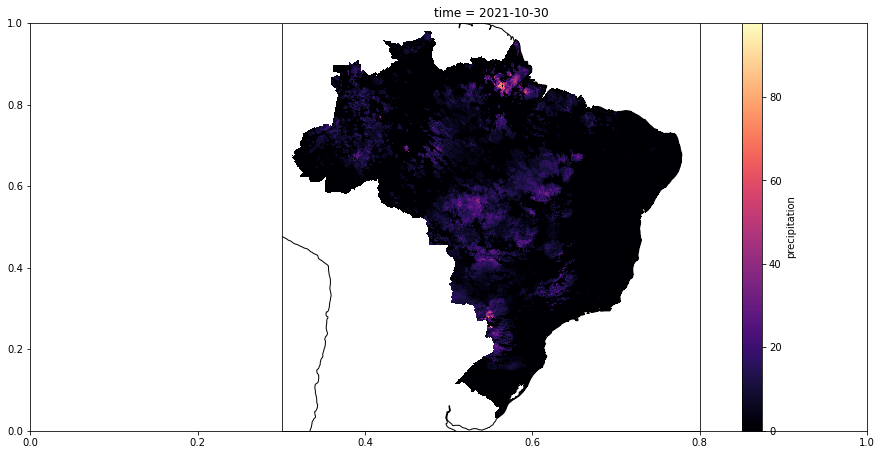

In [4]:
fig, ax = plt.subplots(figsize=(15,7.5))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_global()

da['precipitation'].isel(time=-1).plot.pcolormesh(ax=ax, cmap='magma', transform=ccrs.PlateCarree(), x='x', y='y', add_colorbar=True)
ax.coastlines()

lon_min, lat_min, lon_max, lat_max = (-74, -34, -34, 5)
ax.set_ylim([lat_min-1,lat_max+1]);
ax.set_xlim([lon_min-1,lon_max+1]);

**Display data with `ipyleafle`**

In [5]:
import rioxarray
m = ipyl.Map()
l = da['precipitation'].isel(time=-1).leaflet.plot(m)
m.add_layer(l)
m

Url()

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

**Compute mean value over time**

In [6]:
mean_values = da['precipitation'].sum(['x', 'y']).values

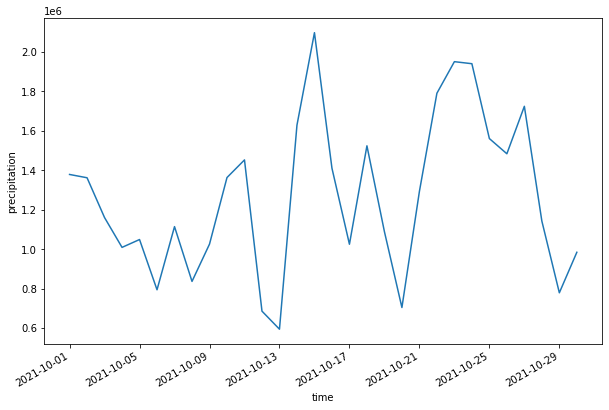

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
da['precipitation'].sum(['x', 'y']).plot(ax=ax)

### Data analysis with `GEE`
**Get mean value over time**

In [71]:
count = chirps.size()
count.getInfo()

30

In [72]:
regReducer = {
    'geometry': aoi,
    'reducer': ee.Reducer.mean(),
    'tileScale': 8,
    'bestEffort': True
}

def func_mean(img):
    reduction = img.reduceRegion(**regReducer)
    properties = img.toDictionary(img.propertyNames()).combine(reduction)#.combine(img.toDictionary(['system:time_start', 'system:footprint', 'system:asset_size', 'system:index','time_start','time_end']))
    return ee.Feature(None, reduction)

def func_proper(feat):
    return ee.Number(ee.Feature(feat).toDictionary().get('precipitation'))

In [73]:
%%time
mean_values = ee.FeatureCollection(chirps.map(func_mean)).toList(count).map(func_proper).getInfo()#.getArray('precipitation').getInfo()
mean_values = np.array(mean_values)

CPU times: user 57.1 ms, sys: 2.41 ms, total: 59.5 ms
Wall time: 1.64 s


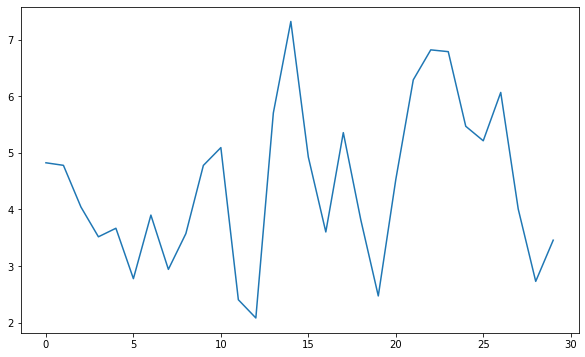

In [74]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(mean_values)

In [75]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

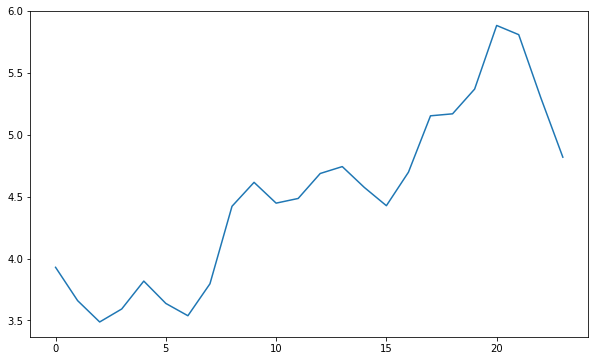

In [76]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(moving_average(mean_values,7))

In [ ]:
# Get last image
image=chirps.limit(1, 'system:time_start', False).first()
image = image.clip(aoi)

In [ ]:
%%time
regReducer = {
    'geometry': ee.Geometry(geometry.get('features')[0].get('geometry')),
    'reducer': ee.Reducer.mean(),
    'tileScale': 8,
    'bestEffort': True
}

image.reduceRegion(**regReducer).get('precipitation').getInfo()

In [ ]:
%%time
regReducer = {
    'collection': clipped_grid,
    'reducer': ee.Reducer.mean(),
    'scale': 5566,
    'tileScale': 8,
}

mean = image.reduceRegions(**regReducer).toList(1).getInfo()[0].get('properties').get('mean')
mean

In [ ]:
clipped_grid.size().getInfo()

In [ ]:
image.reduceRegions(**regReducer).toList(clipped_grid.size()).getInfo()[12].get('properties').get('mean')